In [14]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import ace_tools_open as tools; 
import spacy
from spacy.tokens import Doc
from spacy.lang.pt.examples import sentences 
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt
from transformers import pipeline
import torch
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
nlp = spacy.load('pt_core_news_sm') # commented out once it's loaded

punctuations = list(punctuation)

In [3]:
# Newspapers to search

newsp = ['cmjornal.pt/', 
         'dn.pt/',
         'expresso.pt/',
         'folhanacional.pt/',
         'jn.pt/',
         'ionline.sapo.pt/',   
         'sol.sapo.pt/',
         'observador.pt/',
         'publico.pt/',
         'sabado.pt/',
         'sapo.pt/',
         'visao.pt/',
         ]

not_keywords = ["/multimedia", "/videos", 
                "/famosos", "/celebridades", 
                "/tecnologia", "/boa-vida", 
                "/tendencias", "/desporto",
                "/maissobre", "/ciencia",
                "/cinema", "/cultura",
                "/cidades", "/dinheiro",
                "/blogues", "/podcasts",
                "/vida", "/artes",
                "/iniciativas", "/colunistas/andre",
                "/tribuna"]

stop_words = {'comprida', 'lá', 'mesmo', 'ela', 'de', 'quero', 'vão', 'nesta', 'em', 'com',
              'tais', 'neste', 'obrigado', 'bom', 'for', 'vai', 'fazer', 'tens', 'alguns', 'todos',
              'tu', 'muito', 'estás', 'deve', 'novas', 'todo', 'foste', 'pode', 'pontos', 'pegar',
              'quieto', 'seria', 'eles', 'coisa', 'faz', 'sou', 'daquela', 'tua', 'suas', 'teu',
              'cuja', 'esses', 'vindo', 'aquele', 'um', 'certamente', 'essa', 'no', 'vens', 'também',
              'maiorias', 'fostes', 'tanta', 'elas', 'desse', 'diante', 'pelas', 'nove', 'quinta', 'maior',
              'do', 'quando', 'aqueles', 'desta', 'sabe', 'ambas', 'que', 'tentar', 'estes', 'próximo',
              'povo', 'sem', 'uns', 'tão', 'além', 'geral', 'porquanto', 'fora', 'vêm', 'tivemos',
              'depois', 'ir', 'ora', 'tarde', 'nessa', 'da', 'nós', 'ver', 'tiveram', 'tem',
              'cada', 'exemplo', 'número', 'meus', 'tuas', 'conhecido', 'cento', 'devem', 'para', 'fomos',
              'à', 'favor', 'quanto', 'teve', 'apenas', 'este', 'vais', 'mas', 'querem', 'lugar',
              'vinte', 'quê', 'após', 'apoio', 'mal', 'quarta', 'grande', 'adeus', 'pelos', 'parece',
              'dezanove', 'ligado', 'sob', 'estou', 'ao', 'final', 'talvez', 'demais', 'aos', 'agora',
              'você', 'nem', 'maioria', 'vez', 'treze', 'menor', 'temos', 'possível', 'ambos', 'não',
              'isto', 'dezoito', 'tempo', 'estas', 'área', 'nenhuma', 'fui', 'estará', 'cujo', 'faço',
              'bem', 'logo', 'quais', 'onde', 'menos', 'aquela', 'quatro', 'outras', 'pouca', 'dar',
              'dezasseis', 'último', 'valor', 'é', 'antes', 'aqui', 'mais', 'sétimo', 'dizem', 'estão',
              'veja', 'dezassete', 'ele', 'tivestes', 'tive', 'quarto', 'nova', 'bastante', 'pois', 'apoia',
              'outra', 'teus', 'caminho', 'fazeis', 'lado', 'somente', 'esteve', 'fazemos', 'nesse', 'dessa',
              'numa', 'qualquer', 'momento', 'assim', 'esse', 'boa', 'pôde', 'duas', 'longe', 'meio',
              'saber', 'és', 'ponto', 'daquele', 'estava', 'irá', 'perto', 'num', 'aí', 'umas',
              'nossas', 'falta', 'o', 'dão', 'quer', 'custa', 'tipo', 'sexto', 'vinda', 'segundo',
              'sétima', 'ter', 'seu', 'poder', 'enquanto', 'algo', 'sois', 'se', 'poderá', 'grandes',
              'naquele', 'dá', 'novos', 'tanto', 'cedo', 'vossas', 'cima', 'posição', 'era', 'na',
              'ser', 'vossos', 'seis', 'terceira', 'fim', 'onze', 'disso', 'tentei', 'iniciar', 'minha',
              'apontar', 'estiveram', 'quem', 'fará', 'até', 'sexta', 'zero', 'pouco', 'então', 'sei',
              'vossa', 'ainda', 'nuns', 'parte', 'sua', 'a', 'mês', 'acerca', 'terceiro', 'primeiro',
              'estar', 'oitava', 'grupo', 'porquê', 'contra', 'me', 'forma', 'dizer', 'sete', 'toda',
              'dois', 'portanto', 'estado', 'podia', 'vos', 'máximo', 'vocês', 'comprido', 'tenho', 'baixo',
              'somos', 'através', 'são', 'quinto', 'nada', 'segunda', 'outros', 'sempre', 'vosso', 'certeza',
              'debaixo', 'oitavo', 'lhe', 'dos', 'mil', 'têm', 'desde', 'nível', 'nos', 'usar',
              'primeira', 'fazes', 'fazia', 'tiveste', 'deste', 'corrente', 'oito', 'vós', 'doze', 'das',
              'sistema', 'inclusive', 'já', 'vem', 'contudo', 'minhas', 'cinco', 'estivestes', 'naquela', 'nas',
              'vários', 'tal', 'fazem', 'tentaram', 'posso', 'estiveste', 'direita', 'isso', 'embora', 'pela',
              'uma', 'breve', 'nossa', 'números', 'nossos', 'essas', 'dentro', 'deverá', 'partir', 'próxima',
              'eventual', 'conselho', 'às', 'esta', 'foi', 'só', 'te', 'possivelmente', 'obrigada', 'relação',
              'meses', 'três', 'põem', 'quieta', 'fez', 'ali', 'aquilo', 'sobre', 'qual', 'atrás',
              'estive', 'está', 'sim', 'estivemos', 'todas', 'cá', 'ou', 'muitos', 'porque', 'foram',
              'algumas', 'pelo', 'por', 'tente', 'questão', 'nosso', 'local', 'novo', 'nunca', 'como',
              'meu', 'tudo', 'porém', 'as', 'vezes', 'usa', 'os', 'diz', 'e', 'dez',
              'ademais', 'seus', 'conhecida', 'ontem', 'quinze', 'põe', 'des', 'entre', 'eu', 'catorze',
              'próprio', 'tendes', 'aquelas', 'podem', 'inicio', 'puderam', 'de o', 'correio', ' ', 'manhã',
              'a o', 'comentário', 'conteúdo', 'espaço', 'leitor', '', '”','“', 'em o', 'em a', 'em os', 'em as', 'em',
              'em de', 'em da', 'em do', 'em dos', 'em para', 'em por', 'em com', 'em sem', 'em sobre', 'em sob', 'em acerca',
              'em um', 'em uma', 'em uns', 'em umas', 'em ao', 'em à', 'em aos', 'em às', 'em na', 'em no', 'em nas', 'em nos',
              ' ', '  ', '...'}

In [4]:
df = pd.read_csv('working_file_061224.csv')

# Drop the columns authors, published_date, unnamed: 0, lemmas, Lemma_string, year, lemmas_filtered
df = df.drop(columns=['authors', 'publish_date', 'Unnamed: 0', 'Lemmas', 'Lemma_String', 'year', 'Lemmas_filtered', 'text'])
# Display df using ace tools
tools.display_dataframe_to_user(name="Frequency of Text Length Bins", dataframe=df)
# Count not NaN values in column text
df['filtered_text'].count()


Frequency of Text Length Bins


698

In [5]:
lemmas_dict = {}

# Loop through each text along with its index
for index, row in df.iterrows():
    text = row['filtered_text']  # Access the 'text' column
    if text is None or not isinstance(text, str):
        print(f"Skipping index {index} because the text is None")
        continue
    doc = nlp(text)
    lemmas = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc ]
    lemmas = [ word for word in lemmas if word not in stop_words and word not in punctuations ]
    lemmas = [word for word in lemmas if word not in {"em o", "por o", "", "“", "”", "de este", "em este"}]  # Additional filter
    lemmas_dict[index] = lemmas  # Store lemmas in the dictionary with index as key

# Convert dictionary to a series and assign as a new column in the DataFrame
df['Lemmas_filtered'] = pd.Series(lemmas_dict)

Skipping index 674 because the text is None


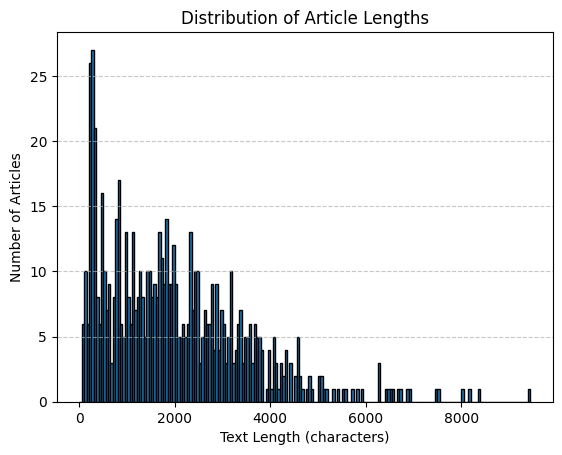

In [6]:
# Drop NaN values in 'filtered_text' column
df = df.dropna(subset=['filtered_text'])

# Calculate the length of each article in 'filtered_text'
df['text_length'] = df['filtered_text'].apply(len)

# Define bins for text lengths
bins = range(0, df['text_length'].max() + 50, 50)

# Create a histogram
plt.hist(df['text_length'], bins=bins, edgecolor='black')

# Customize the plot
plt.title('Distribution of Article Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:

# Ensure all entries in 'Lemmas_filtered' are lists, replacing invalid entries with an empty list
df['Lemmas_filtered'] = df['Lemmas_filtered'].apply(lambda x: x if isinstance(x, list) else [])

# Join the lists in 'Lemmas_filtered' into strings
df['Lemmas_str'] = df['Lemmas_filtered'].apply(lambda x: ' '.join(x))

# Words out of the topics
not_topics = ['andre', 'andré','ventura', 'chega', 'partido', 'lusa', 'presidente', 'haver', 'deputado', 'se', 'querer']
stop_words = list(stop_words)
stop_words.extend(not_topics) # Add the words to the stop words list
# Step 1: Vectorize the text
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words=stop_words)  # Adjust min_df and max_df as needed
doc_term_matrix = vectorizer.fit_transform(df['Lemmas_str'])

# Step 2: Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Choose number of topics
lda.fit(doc_term_matrix)

# Step 3: Extract topics and keywords
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-4:]]  # Top 10 words per topic
    topics.append(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Step 4: Display topics
topics_df = pd.DataFrame({"Topic": topics})
print("Identified Topics:")
# Display df using ace tools
tools.display_dataframe_to_user(name="Identified Topics", dataframe=topics_df)
print(topics_df)
# Optional: Visualize topic distribution for each document
topic_distribution = lda.transform(doc_term_matrix)



Identified Topics:
Identified Topics


Topic
Loading ITables v2.2.3 from the internet... (need help?)


                                               Topic
0                  Topic 1: cds acordo coligação psd
1      Topic 2: sousa presidencial marcelo candidato
2                   Topic 3: psd ps candidato câmara
3           Topic 4: parlamentar psd líder república
4               Topic 5: líder pessoa tribunal lista
5                  Topic 6: pena direito projeto lei
6  Topic 7: parlamento rodrigues assembleia repúb...
7              Topic 8: portugal nacional pessoa dia
8          Topic 9: país comunidade português cigano
9               Topic 10: governo nacional líder psd


In [5]:
#df.to_csv('working_file_061224.csv', index=False)  # Save the DataFrame to a CSV file
df = pd.read_csv('working_file_061224.csv')
df.head()

,url,timestamp,processed_url_text,newspaper,arquivo_url,title,filtered_text,text_length,Lemmas_filtered,Lemmas_str
0,https://www.cmjornal.pt/mundo/detalhe/andre-ve...,20210125190801,andre ventura apelidado de trump portugues na ...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202101251908...,"André Ventura apelidado de ""Trump português"" n...",Jornal francês destaca ascensão da extrema dir...,1928,"['jornal', 'francês', 'destacar', 'ascensão', ...",jornal francês destacar ascensão extremo país ...
1,https://www.cmjornal.pt/politica/detalhe/debat...,20210120182636,debate tenso entre andre ventura e joao ferrei...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202101201826...,Debate tenso entre André Ventura e João Ferrei...,Os candidatos presidenciais João Ferreira e An...,3960,"['candidato', 'presidencial', 'joão', 'ferreir...",candidato presidencial joão ferreira andré ven...
2,https://www.dn.pt/edicao-do-dia/01-jul-2021/ve...,20210701033951,ventura acusa familia coxi de inventar discrim...,dn.pt/,https://arquivo.pt/noFrame/replay/202107010339...,"Ventura acusa família Coxi de ""inventar discri...","Ventura acusa família Coxi de ""inventar discri...",394,"['ventura', 'acusar', 'família', 'coxi', 'inve...",ventura acusar família coxi inventar discrimin...
3,https://www.dn.pt/edicao-do-dia/03-nov-2019/o-...,20200101191546,o cds esta em circunstancias muito dificeis en...,dn.pt/,https://arquivo.pt/noFrame/replay/202001011915...,"""O CDS está em circunstâncias muito difíceis e...",Nesta semana viu-se envolvido na polémica da r...,150,"['semana', 'viu-se', 'envolver', 'polémica', '...",semana viu-se envolver polémica resolução refu...
4,https://www.dn.pt/edicao-do-dia/07-ago-2020/cr...,20200807084230,crianca negra cartaz em manifestacao do chega,dn.pt/,https://arquivo.pt/noFrame/replay/202008070842...,"Criança negra ""cartaz"" em manifestação do Chega","Criança negra ""cartaz"" em manifestação do Cheg...",346,"['criança', 'negro', 'cartaz', 'manifestação',...",criança negro cartaz manifestação chega menina...


In [ ]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model = "neuralmind/bert-base-portuguese-cased",
    tokenizer = "neuralmind/bert-base-portuguese-cased",
    truncation=True,  # Truncate sequences longer than the model's maximum
    max_length=512,  # Limit the length of the input sequence
)

# Perform sentiment analysis
df['sentiment'] = df.iloc[:5]['filtered_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Display results
tools.display_dataframe_to_user(name="Portuguese News Article Sentiment Analysis", dataframe=df)

TF-IDF Matrix


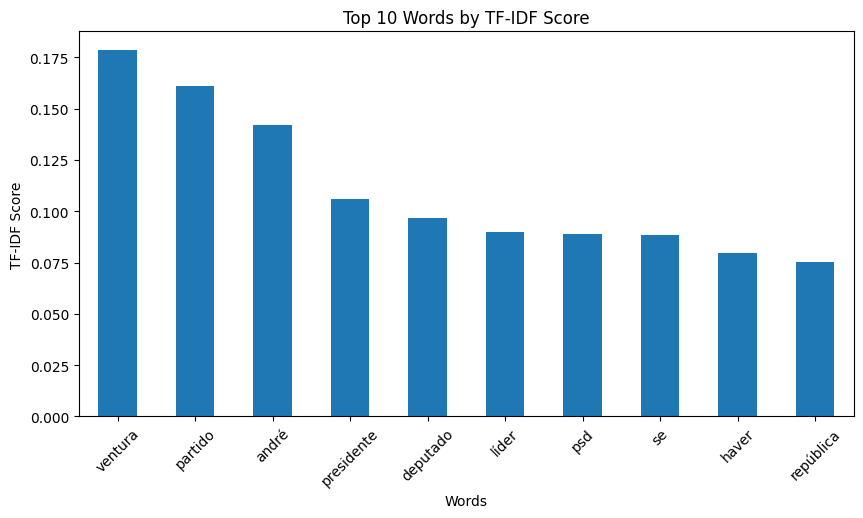

In [13]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, max_features=50)

# Compute TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['Lemmas_str'])

# Create a DataFrame to display the results
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

# Summarize TF-IDF scores
tfidf_mean = tfidf_df.mean(axis=0).sort_values(ascending=False)

tools.display_dataframe_to_user(name="TF-IDF Matrix", dataframe=tfidf_df)

# Plot the top 10 words by TF-IDF score
tfidf_mean.head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Words by TF-IDF Score')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

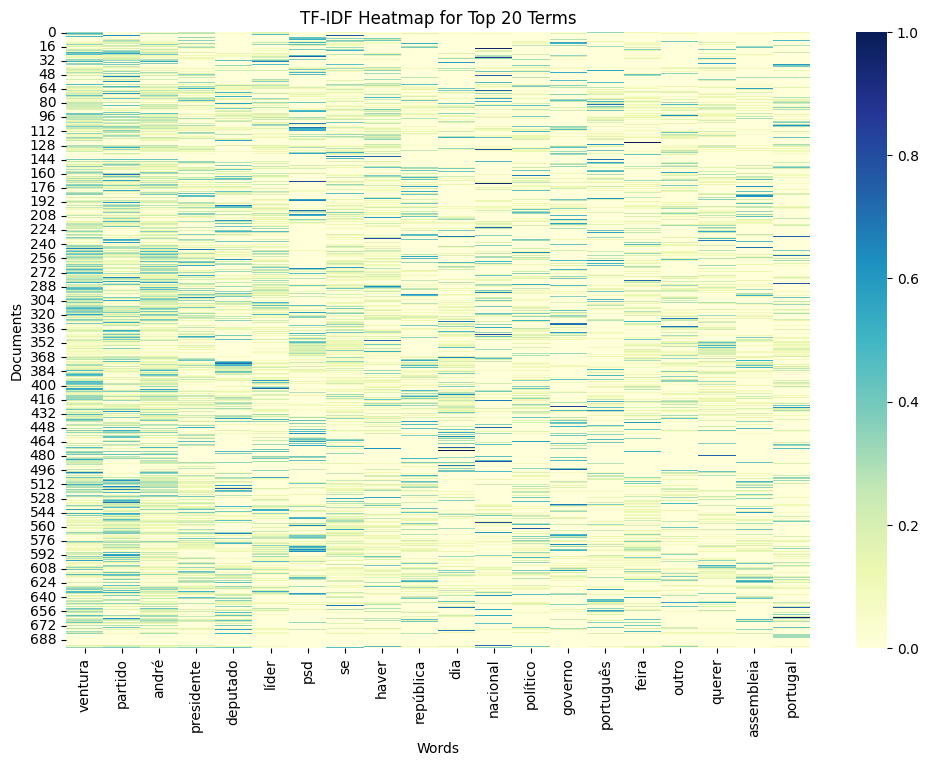

In [15]:
# Select the top 20 terms by mean TF-IDF score
top_terms = tfidf_mean.head(20).index
tfidf_top = tfidf_df[top_terms]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_top, annot=False, cmap='YlGnBu', cbar=True)
plt.title('TF-IDF Heatmap for Top 20 Terms')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()

In [17]:
from textblob import TextBlob

df['sentiment'] = df['filtered_text'].apply(lambda x: TextBlob(x).sentiment.polarity)



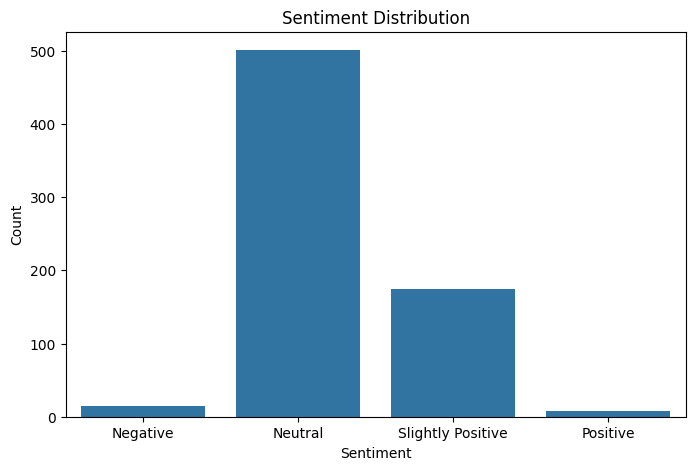

In [20]:
# Bin plotting of sentiment in df
bins = [-1, -0.5, 0, 0.5, 1]
labels = ['Negative', 'Neutral', 'Slightly Positive', 'Positive']
df['sentiment_bin'] = pd.cut(df['sentiment'], bins=bins, labels=labels)

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_bin', data=df, order=labels)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
